In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  



In [2]:
df=pd.read_csv('stations.csv')
df.head()

,coordinates,temp,dewpoint,humidity,name
0,> 40.847 -73.863 > 52 ft,79; 73; 76,55.8; 51.3; 53.2,51; 38; 45,KNYBRONX22
1,> 40.884 -73.910 > 180 ft,78.6; 73.6; 76.1,60.7; 54.3; 57.4,60; 48; 52,KNYBRONX23
2,> 40.878 -73.911 > 45 ft,90.7; 60.8; 75.8,54.3; 47.6; 51.8,75; 23; 47,KNYBRONX31
3,> 40.890 -73.915 > 249 ft,78.8; 75.6; 77.2,58.2; 53; 56.4,49; 42; 48,KNYBRONX33
4,> 40.862 -73.880 > 121 ft,NaN,NaN,NaN,KNYBRONX14


In [69]:
df['lat']=df.coordinates.apply(lambda x: float(x.split('>')[1].split(' ')[1]))
df['lon']=df.coordinates.apply(lambda x: float(x.split('>')[1].split(' ')[2]))
df['h']=df.coordinates.apply(lambda x: float(x.split('>')[2].split(' ')[1]))

df=df.dropna()
df['Temp_max']=df.temp.apply(lambda x: x.split(';')[0])
df['Temp_max']=df.Temp_max.apply(lambda x: float(x))
df = df[df.temp != '9999']
df['Temp_min']=df.temp.apply(lambda x: x.split(';')[1])
df['Temp_med']=df.temp.apply(lambda x: x.split(';')[2])
df['Temp_med']=df.Temp_med.apply(lambda x: float(x))
df['Temp_min']=df.Temp_min.apply(lambda x: float(x))




In [5]:
plt.figure(figsize=(8,12))
plt.scatter(lon[h<20],lat[h<20])
# plt.scatter(lon[h>20],lat[h>20], color='red')
plt.xlim([-74.1,-73.6])
plt.ylim([40.5,40.95])

NameError: name 'lon' is not defined

In [ ]:
h.hist(range=[0,100],bins=100)

In [ ]:
print sum(h>20)
print sum((h<20) & (h >-1))

In [7]:
Man=pd.read_csv('ManhattanTree.csv')
Broo=pd.read_csv('BrooklynTree.csv')
Que=pd.read_csv('QueensTree.csv')

df_trees=Man.append(Broo)
df_trees=df_trees.append(Que)
df_trees=df_trees[df_trees.CROSSSTREE != 'not listed']
df_trees=df_trees.drop(df_trees.the_geom != 'NaN')
df_trees=df_trees.drop('OBJECTID',1)
df_trees=df_trees.drop('OBJECTID_1',1)


df_trees=df_trees.dropna()
df_trees.BOROUGH.value_counts()

Queens       225101
Brooklyn     132235
Manhattan     47389
Name: BOROUGH, dtype: int64

In [8]:
df_trees['lon']=df_trees.the_geom.apply(lambda x: float(x.replace('POINT (','').replace(')','').split(' ')[0]))
df_trees['lat']=df_trees.the_geom.apply(lambda x: float(x.replace('POINT (','').replace(')','').split(' ')[1]))

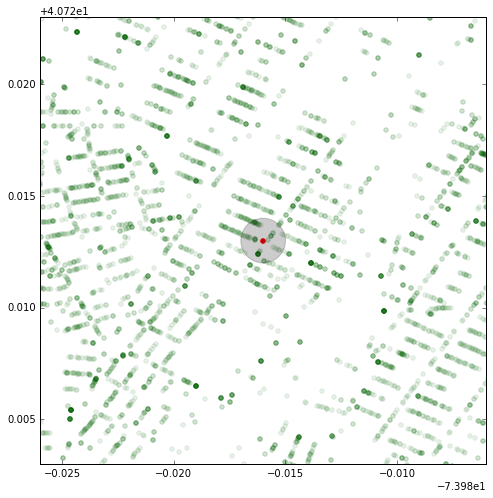

In [9]:
# fig,ax=plt.figure(figsize=(8,12))
plt.figure(figsize=(8,8))
ax=plt.subplot(aspect='equal')

index=100
plt.scatter(df_trees.lon, df_trees.lat, alpha=0.09, color='darkgreen')
plt.scatter(df.iloc[index].lon, df.iloc[index].lat, color='red')
plt.xlim([df.iloc[index].lon-0.01,df.iloc[index].lon+0.01])
plt.ylim([df.iloc[index].lat-0.01,df.iloc[index].lat+0.01])
circle1=plt.Circle((df.iloc[index].lon,df.iloc[index].lat),0.001,color='black',alpha=0.2)
plt.gcf().gca().add_artist(circle1)


In [10]:
demean = lambda df: df - df.mean()
df2=df.groupby(['name']).transform(demean)[['Temp_max','Temp_min','Temp_med']]
df2.columns=['Temp_max_s','Temp_min_s','Temp_med_s']
df['Temp_max_s']=df2['Temp_max_s']
df['Temp_min_s']=df2['Temp_min_s']
df['Temp_med_s']=df2['Temp_med_s']
df=df[(df.lon < -73.8) &(df.lat < 40.82)]
 
df['Trees']=[-1]*len(df)
for index, row in df.iterrows():   
    sel = (df_trees.lat > (row['lat']-0.01))&(df_trees.lat < (row['lat']+0.01)) & (df_trees.lon > (row['lon']-0.01))&(df_trees.lon < (row['lon']+0.01))
   
    if sum(sel) > 0:
        a=df_trees[sel].apply(lambda x:(x.lat-row['lat'])**2 + (x.lon-row['lon'])**2 <= 0.001**2,axis=1).sum()
        df=df.set_value(index,'Trees',a)
    
    
    

In [57]:
df.Temp_max_s)

SyntaxError: invalid syntax (<ipython-input-57-007012a0faaa>, line 1)

In [65]:
height=30
metric='Temp_mean_s'
howmanytress=5

df[(df.Trees > -1) & (df.Trees > howmanytress) & (df.h < height)][metric].hist(range=[-10,10], alpha=0.6, label='withtrees',normed=1, histtype='step', linewidth=5, color='blue')
df[(df.Trees > -1 ) & (df.Trees < howmanytress) & (df.h < height)][metric].hist(range=[-10,10], alpha=0.6, label='notrees',normed=1, histtype='step', linewidth=5, color='red')
plt.legend()
print 'with trees', df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h < height)][metric].mean(), len( df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h < height)])
print 'no trees', df[(df.Trees > -1 ) & (df.Trees < howmanytress) & (df.h < height)][metric].mean(), len( df[(df.Trees > -1 ) & (df.Trees < howmanytress) & (df.h < height)])

KeyError: 'Temp_mean_s'

with trees 75.4416666667 120
no trees 75.775 16


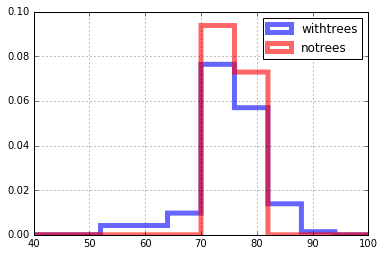

In [27]:

height=30
metric='Temp_med'
howmanytress=5



df[(df.Trees > -1 ) & (df.Trees > howmanytress) & (df.h > height)][metric].hist(range=[40,100], alpha=0.6, label='withtrees', normed=1, histtype='step', linewidth=5, color='blue')
df[(df.Trees > -1) & (df.Trees < howmanytress )& (df.h > height)][metric].hist(range=[40,100], alpha=0.6, label='notrees',normed=1, histtype='step', linewidth=5, color='red')
print  'with trees',df[(df.Trees > -1) & (df.Trees > howmanytress )& (df.h > height)][metric].mean(), len(df[(df.Trees > -1) & (df.Trees > howmanytress )& (df.h > height)])
print  'no trees', df[(df.Trees > -1) & (df.Trees < howmanytress )& (df.h > height)][metric].mean(), len(df[(df.Trees > -1) & (df.Trees < howmanytress )& (df.h > height)])


plt.legend()

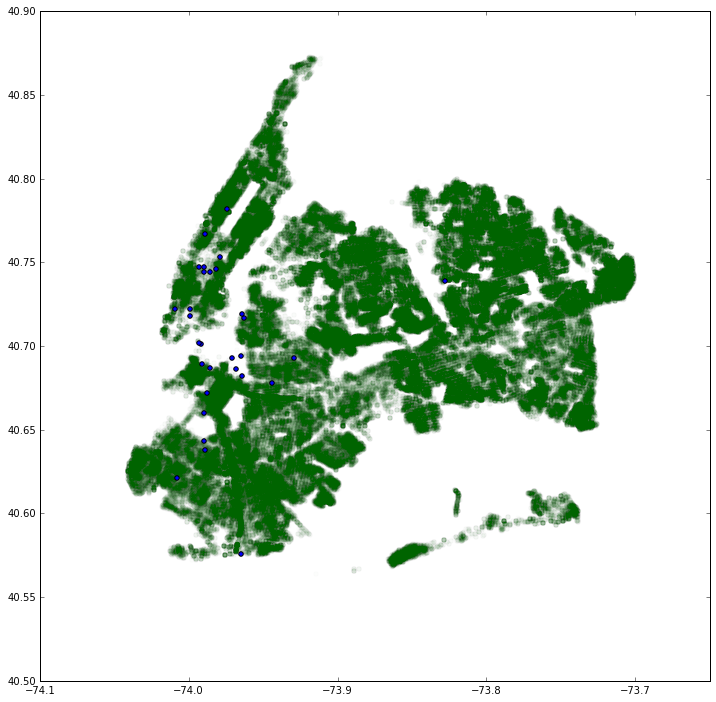

In [71]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df_trees.lon, df_trees.lat, alpha=0.01, color='darkgreen')
plt.scatter(df[(df.Trees > -1 ) & (df.Trees < 20) & (df.h > 30)].lon,
    df[(df.Trees > -1 ) & (df.Trees < 20) & (df.h > 30)].lat)
# plt.scatter(df.iloc[28].lon,df.iloc[28].lat, color='red')

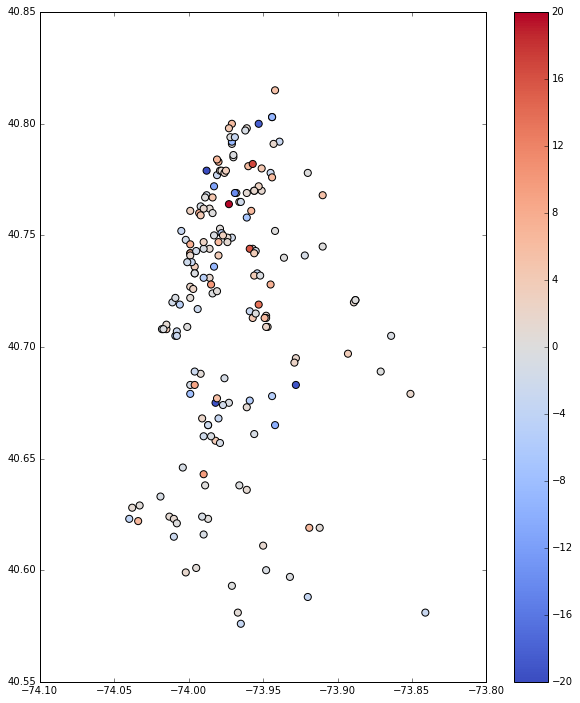

In [68]:
close = df[(df.Trees >-1) & (df.Trees > howmanytress)].Temp_med_s
plt.figure(figsize=(10,12))



plt.scatter(df[(df.Trees >-1 ) & (df.Trees > howmanytress)].lon,df[(df.Trees >-1 )& (df.Trees > howmanytress)].lat,s=50, c=close, cmap='coolwarm')

plt.clim(-20,20)
plt.colorbar()


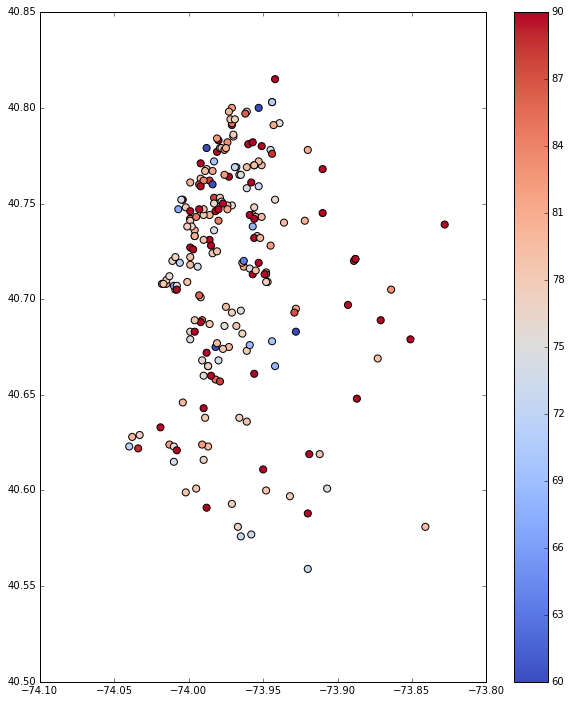

In [16]:
howmanytress=1000
close = df[(df.Trees >-1) & (df.Trees < howmanytress)].Temp_max
plt.figure(figsize=(10,12))



plt.scatter(df[(df.Trees >-1 ) & (df.Trees < howmanytress)].lon,df[(df.Trees >-1 )& (df.Trees < howmanytress)].lat,s=50, c=close, cmap='coolwarm')

plt.clim(60,90)
plt.colorbar()




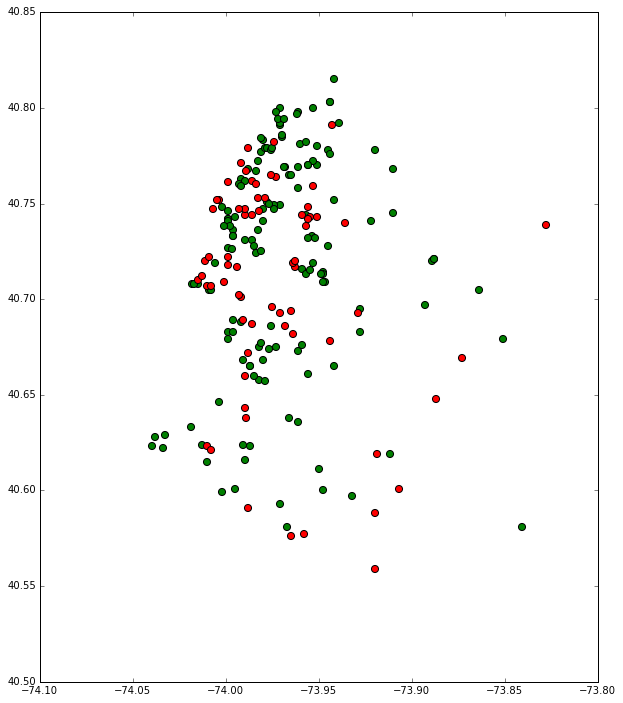

In [17]:
plt.figure(figsize=(10,12))

howmanytress=20
plt.scatter(df[(df.Trees >-1 ) & (df.Trees > howmanytress)].lon,df[(df.Trees >-1 )& (df.Trees > howmanytress)].lat,s=50, c='green', cmap='coolwarm')
plt.scatter(df[(df.Trees >-1 ) & (df.Trees < howmanytress)].lon,df[(df.Trees >-1 )& (df.Trees < howmanytress)].lat,s=50, c='red', cmap='coolwarm')



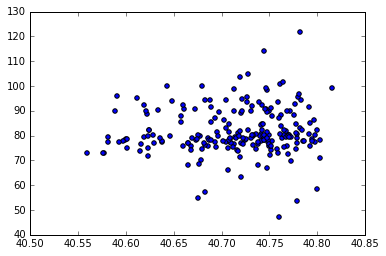

In [18]:

plt.scatter(df[(df.Trees >-1 ) ].lat, df[(df.Trees >-1 ) ].Temp_max)

In [37]:
df.name=df.name.apply(lambda x: x[0:5])

In [50]:
df.head()

,coordinates,temp,dewpoint,humidity,name,lat,lon,h,Temp_max,Temp_min,Temp_med,Trees,Temp_max_s
5,> 40.600 -73.948 > 13 ft,78.8; 69.4; 72.9,53; 49; 50.6,53; 41; 47,KNYBR,40.600,-73.948,13,78.8,69.4,72.9,32,0.641667
6,> 40.717 -73.963 > 64 ft,81; 67.3; 74.2,41.4; 31; 36.8,39; 21; 30,KNYBR,40.717,-73.963,64,81.0,67.3,74.2,1,2.841667
7,> 40.624 -74.013 > 89 ft,82.1; 67.5; 74.8,58.4; 51.8; 53.9,62; 41; 51,KNYBR,40.624,-74.013,89,82.1,67.5,74.8,32,3.941667
8,> 40.695 -73.928 > 62 ft,81.3; 69.6; 75.4,56; 51; 50.2,56; 41; 45,KNYBR,40.695,-73.928,62,81.3,69.6,75.4,26,3.141667
9,> 40.714 -73.948 > 39 ft,79.3; 70.9; 75.1,57; 52; 54.2,57; 42; 50,KNYBR,40.714,-73.948,39,79.3,70.9,75.1,37,1.141667
